# Aufgabe 4: Faltungstheorem
Das Faltungstheorem
\begin{align}
 F * G &= \mathcal{F}^{-1}(\mathcal{F}(F) \cdot \mathcal{F}(G))
\end{align}

besagt, dass eine Faltung im Ortsraum äquivalent zu einer Multiplikation im Frequenzraum ist.
Prüfen Sie die Gültigkeit dieses Theorems an mindestens zwei praktischen Beispielen mit selbst gewählten Filtermasken!
Vergleichen und analysieren Sie sowohl die Ergebnisse als auch die Rechenzeiten im Hinblick auf verschiedene Filtergrößen!

## 0. Pfade, Pakete etc.

In [17]:
import glob
import imageio
import numpy as np
import scipy.ndimage
import math

%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
image_filter = 'Bilder/*.jpg'

## 1. Definition der Faltungsmaske
Definieren Sie hier die zu prüfenden Faltungsmaske `A` und `B`.

In [19]:
# mask A is gauss
m = 11
sigma = m / 5

offset = (m - 1) // 2
A = np.asarray([
    [
        np.exp(-(((cx - offset)**2) + ((cy - offset)**2)) / (2 * (sigma ** 2)))
        for cx in range(m)
    ] for cy in range(m)
])
A /= np.sum(A)

# mask B is sobel
B = np.asarray([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1],
])

## 2. Laden und Normalisieren des Bildes

In [20]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

In [21]:
image = image.astype(np.float32)
image -= image.min()
image /= image.max()

## 3. Berechnung der Fouriertransformation
Setzen Sie hier ihre Lösung aus der vorigen Aufgabe ein:

In [22]:
image_transformed = np.fft.fft2(image)
image_transformed = np.fft.fftshift(image_transformed)

Berechnen Sie nun die Fouriertransformation der Faltungsmasken. Achten Sie darauf, dass das Ergebnis dieser Operation dieselbe Größe hat wie `image_transformed`!

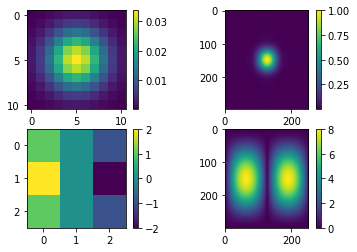

In [23]:
A_transformed = np.absolute(np.fft.fftshift(np.fft.fft2(A, s=image.shape)))
B_transformed = np.absolute(np.fft.fftshift(np.fft.fft2(B, s=image.shape)))
plt.subplot(221)
plt.imshow(A)
plt.colorbar()
plt.subplot(222)
plt.imshow(A_transformed)
plt.colorbar()
plt.subplot(223)
plt.imshow(B)
plt.colorbar()
plt.subplot(224)
plt.imshow(B_transformed)
plt.colorbar()
plt.show()

## 4. Filterung

Definieren Sie nun eine Funktion `ex3_filter_in_freq_domain`, die einen Filter im Frequenzbereich auf ein bereits fouriertransformiertes Bild anwendet. Beachten Sie das Faltungstheorem!

In [24]:
def ex3_filter_in_freq_domain(spectrum, transformed_filter):
    return spectrum * transformed_filter

Das transformierte Bild (Spektrum) wird nun gefiltert.

In [25]:
%%time
# %time does not work that well in jupyter vscode
image_transformed_filtered_A = ex3_filter_in_freq_domain(image_transformed, A_transformed)

CPU times: user 806 µs, sys: 330 µs, total: 1.14 ms
Wall time: 601 µs


In [26]:
%%time
# %time does not work that well in jupyter vscode
image_transformed_filtered_B = ex3_filter_in_freq_domain(image_transformed, B_transformed)

CPU times: user 3.06 ms, sys: 0 ns, total: 3.06 ms
Wall time: 1.41 ms


## 5. Inverse Filterung
Das veränderte Spektrum soll nun in den Ortsbereich zurücktransformiert werden. Verwenden Sie dazu die entsprechenden Funktionen des Paketes `numpy.fft`.

In [27]:
image_filtered_A = np.fft.ifft2(np.fft.ifftshift(image_transformed_filtered_A)).real
image_filtered_B = np.fft.ifft2(np.fft.ifftshift(image_transformed_filtered_B)).real

Vergleichen Sie nun das gefilterte Bild mit dem Originalbild:

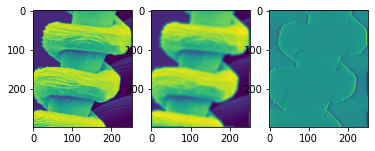

In [28]:
plt.subplot(131)
plt.imshow(image)
plt.subplot(132)
plt.imshow(image_filtered_A)
plt.subplot(133)
plt.imshow(image_filtered_B)
plt.show()

## 6. Vergleich mit regulärer Faltung
Im Folgenden wird das Bild mittels der Bibliotheksfunktion `scipy.ndimage.filters.convolve` mit `A` und `B` gefaltet.

In [29]:
%%time
# %time does not work that well in jupyter vscode
image_convolved_A = scipy.ndimage.filters.convolve(image, A, mode='constant')

CPU times: user 21.2 ms, sys: 236 µs, total: 21.4 ms
Wall time: 18.6 ms


In [30]:
%%time
# %time does not work that well in jupyter vscode
image_convolved_B = scipy.ndimage.filters.convolve(image, B, mode='constant')

CPU times: user 5.26 ms, sys: 0 ns, total: 5.26 ms
Wall time: 2.61 ms


Vergleichen Sie `image_convolved` mit `image_filtered`, indem Sie die Bilder nebeneinander anzeigen:

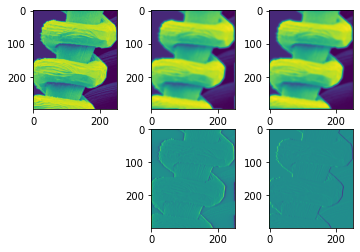

In [32]:
plt.subplot(231)
plt.imshow(image)
plt.subplot(232)
plt.imshow(image_filtered_A)
plt.subplot(233)
plt.imshow(image_convolved_A)
plt.subplot(235)
plt.imshow(image_filtered_B)
plt.subplot(236)
plt.imshow(image_convolved_B)
plt.show()

### Welche Aussage lässt sich hinsichtlich der Rechenzeit der Faltung mittels Fourier-Transformation im Vergleich zur regulären Faltung treffen?

Die Faltung im Frequenzraum geht deutlich schneller, da sie dort ein im Punktoperator ist.